# Library

In [1]:
!pip3.12 install langdetect

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     -------------------------------------- 981.5/981.5 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993251 sha256=b94f0b3265927e0b228445b11332bf502a8ee9154c82703e5f54cdaf0a13a71f
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\c1\67\88\e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import shutil
import zipfile
import pandas as pd

os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'

!kaggle datasets download -d aksharagadwe/abbreviations-and-slangs-for-text-preprocessing -p /content
destination_path = "/content/abbreviations-and-slangs-for-text-preprocessing"
os.makedirs(destination_path, exist_ok=True)
shutil.move("/content/abbreviations-and-slangs-for-text-preprocessing.zip", destination_path)

with zipfile.ZipFile(os.path.join(destination_path, 'abbreviations-and-slangs-for-text-preprocessing.zip'), 'r') as zip_ref:
    all_files = zip_ref.namelist()
    abbreviation_files = [f for f in all_files if 'abbreviation' in f.lower()]
    for file in abbreviation_files:
        zip_ref.extract(file, destination_path)

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import spacy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import unicodedata
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2


# import gensim
# from gensim.models import Word2Vec
# from wordcloud import WordCloud

# from nltk.stem import PorterStemmer
# from textblob import TextBlob

nltk.download("vader_lexicon")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       dat

True

# Data Understading

## Data FC24

In [4]:
df_fc24= pd.read_csv('FC_24.csv')
df_fc24.head()

,ReviewText,Review,ReviewLength,PlayHours,DatePosted
0,Like a drug addiction.,Not Recommended,19,47.7 hrs on record,Posted: 14 November
1,EA FIX YOUR DAMN GAME IVE BOUGHT THIS GAME AND...,Not Recommended,95,44.6 hrs on record,Posted: 14 November
2,anticheat many troubleshot,Not Recommended,24,272.0 hrs on record,Posted: 14 November
3,fine,Recommended,4,573.8 hrs on record,Posted: 14 November
4,mnv sycks,Recommended,8,31.3 hrs on record,Posted: 14 November


In [5]:
df_fc24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21890 entries, 0 to 21889
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ReviewText    21798 non-null  object
 1   Review        21890 non-null  object
 2   ReviewLength  21890 non-null  int64 
 3   PlayHours     21890 non-null  object
 4   DatePosted    21890 non-null  object
dtypes: int64(1), object(4)
memory usage: 855.2+ KB


In [6]:
df_fc24.dropna(inplace=True)

## Data FC25

In [7]:
df_fc25= pd.read_csv('FC_25.csv')
df_fc25.head()

,ReviewText,Review,ReviewLength,PlayHours,DatePosted
0,I do not want to type much because i might be ...,Not Recommended,91,46.5 hrs on record,Posted: 21 November
1,doesnt allow nintendo pro controller for me,Recommended,37,12.7 hrs on record,Posted: 21 November
2,A great way to kill some time :D,Recommended,25,44.6 hrs on record,Posted: 21 November
3,this game is so buns and unrealistic bro ur te...,Not Recommended,420,15.1 hrs on record,Posted: 21 November
4,The game is really bad made... if the game wan...,Not Recommended,243,66.8 hrs on record,Posted: 21 November


In [8]:
df_fc25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3860 entries, 0 to 3859
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ReviewText    3853 non-null   object
 1   Review        3860 non-null   object
 2   ReviewLength  3860 non-null   int64 
 3   PlayHours     3860 non-null   object
 4   DatePosted    3860 non-null   object
dtypes: int64(1), object(4)
memory usage: 150.9+ KB


In [9]:
df_fc25.dropna(inplace=True)

# Language Detection

In [10]:
from langdetect import detect

# Fungsi untuk mendeteksi bahasa
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Tambahkan kolom deteksi bahasa
df_fc24["Language"] = df_fc24["ReviewText"].apply(detect_language)
df_fc25["Language"] = df_fc25["ReviewText"].apply(detect_language)

# Lihat distribusi bahasa
print(df_fc24["Language"].value_counts())
print(df_fc25["Language"].value_counts())


Language
en         11501
so          1824
unknown      865
tl           681
de           630
pl           479
af           466
cy           442
sw           337
da           337
es           322
no           302
id           300
tr           275
ca           237
ro           222
pt           211
fi           207
nl           199
it           188
vi           187
fr           184
sq           177
et           170
hr           158
sl           157
sk           147
ar           143
sv            82
hu            73
lt            63
lv            52
fa            41
cs            40
th            26
ru            17
he            14
ur            13
ko            10
zh-cn          5
bg             4
el             4
mk             3
ja             1
bn             1
uk             1
Name: count, dtype: int64
Language
en         2548
so          220
unknown     164
de           87
cy           59
tl           59
da           49
af           45
sw           45
pl           44
no           3

In [11]:
# Hanya ambil ulasan dalam Bahasa Inggris
df_fc24 = df_fc24[df_fc24["Language"] == "en"]
df_fc25 = df_fc25[df_fc25["Language"] == "en"]

In [12]:
len(df_fc24)
len(df_fc25)

2548

# Prepocessing

In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_content(content):
    # Mengkonversi teks menjadi huruf kecil
    content = content.lower()

    # Menghapus URL
    content = re.sub(r'http\S+|www\S+|https\S+', '', content, flags=re.MULTILINE)

    # Menghapus HTML tags
    content = re.sub(r'<.*?>', '', content)

    # Menghapus mention (@usernames)
    content = re.sub(r'@\w+', '', content)

    # Menghapus tanda baca dan angka
    content = re.sub(r'[^a-z\s]', '', content)

    # Tokenisasi
    words = content.split()

    # Mengganti karakter yang berulang (contoh: "sooo" -> "so")
    words = [re.sub(r'(.)\1{2,}', r'\1\1', word) for word in words]

    # POS tagging
    pos_tags = pos_tag(words)

    # Lemmatization dengan POS Tagging
    lemmatized_words = []
    for word, tag in pos_tags:
        if word not in stops:
            wordnet_pos = get_wordnet_pos(tag)
            lemmatized_words.append(lemmatizer.lemmatize(word, pos=wordnet_pos))

    cleaned_content = ' '.join(lemmatized_words)

    return cleaned_content


In [14]:
list_df = [df_fc24, df_fc25]

for df in list_df:
    df['ReviewText'] = df['ReviewText'].apply(clean_content)

In [15]:
duplicate_fc24 = df_fc24[df_fc24.duplicated()]
duplicate_fc25 = df_fc25[df_fc25.duplicated()]

print("Number of duplicate rows in df_fc24:", len(duplicate_fc24))
print("Number of duplicate rows in df_fc25:", len(duplicate_fc25))

Number of duplicate rows in df_fc24: 163
Number of duplicate rows in df_fc25: 0


In [16]:
# Remove duplicate rows in df_fc24
df_fc24.drop_duplicates(inplace=True)
duplicate_fc24 = df_fc24[df_fc24.duplicated()]

# Remove duplicate rows in df_fc25
df_fc25.drop_duplicates(inplace=True)
duplicate_fc25 = df_fc25[df_fc25.duplicated()]

print("Number of duplicate rows in df_fc24:", len(duplicate_fc24))
print("Number of duplicate rows in df_fc25:", len(duplicate_fc25))

Number of duplicate rows in df_fc24: 0
Number of duplicate rows in df_fc25: 0


# Abbrevation Handling

In [17]:
df_acronyms = pd.read_csv('abbreviations-and-slangs-for-text-preprocessing/Abbreviations and Slang.csv')

acronyms_dict = dict(zip(df_acronyms['Abbreviations'], df_acronyms['Text']))

manual_acronyms = {
    'u': 'you',
    'r': 'are',
    'some1': 'someone',
    'yrs': 'years',
    'hrs': 'hours',
    'mins': 'minutes',
    'secs': 'seconds',
    "ur": "your",
    "pls": "please",
    "thx": "thanks",
    "wont": "will not",
    "im": "i am",
    "idk": "i do not know",
    "gonna": "going to",
    "wanna": "want to",
    "didnt": "did not",
    "doesnt": "does not",
    "dont": "do not",
    "wont": "will not",
    "cant": "cannot",
    "youre": "you are",
    "youve": "you have",
    "youll": "you will",
    "youre": "you are",
    "ive" : "i have",
    "dont": "do not",
    "havent": "have not",
    "isnt": "is not",
    "arent": "are not",
    "wasnt": "was not",
    "werent": "were not",
    "shouldnt": "should not",
    "wouldnt": "would not",
    "couldnt": "could not",
    "aint": "is not",
    "arent": "are not",
    "lmfao": "laugh my freak ass off",
    "lmfaoo": "laugh my freak ass off",
    "lmfaooo": "laugh my freak ass off",
    "ai" : "artificial intelligent",
    "alway":"always"
}

acronyms_dict.update(manual_acronyms)

def replace_acronyms(text, acronyms_dict):
    for acronym, expansion in acronyms_dict.items():
        text = re.sub(r'\b' + re.escape(acronym) + r'\b', expansion, text, flags=re.IGNORECASE)
    return text

In [18]:
for df in list_df:
  df['ReviewText'] = df['ReviewText'].apply(lambda x: replace_acronyms(x, acronyms_dict))

# Vader Labelling

In [19]:
from collections import Counter

def analyze_word_frequency(df, review_column, recommendation_column, category):
    combined_reviews = " ".join(df[df[recommendation_column] == category][review_column])

    word_frequency = Counter(combined_reviews.split())

    return word_frequency

recommended_words_fc24 = analyze_word_frequency(df_fc24, "ReviewText", "Review", "Recommended")
not_recommended_words_fc24 = analyze_word_frequency(df_fc24, "ReviewText", "Review", "Not Recommended")

recommended_words_fc25 = analyze_word_frequency(df_fc25, "ReviewText", "Review", "Recommended")
not_recommended_words_fc25 = analyze_word_frequency(df_fc25, "ReviewText", "Review", "Not Recommended")

# Tampilkan hasil
print("Top words in FIFA 2024 Recommended reviews:")
print(recommended_words_fc24.most_common(30))

print("\nTop words in FIFA 2024 Not Recommended reviews:")
print(not_recommended_words_fc24.most_common(30))

print("\nTop words in FIFA 2025 Recommended reviews:")
print(recommended_words_fc25.most_common(30))

print("\nTop words in FIFA 2025 Not Recommended reviews:")
print(not_recommended_words_fc25.most_common(30))


Top words in FIFA 2024 Recommended reviews:
[('game', 3088), ('good', 1257), ('play', 929), ('fifa', 533), ('not', 518), ('fun', 513), ('like', 491), ('get', 426), ('football', 413), ('player', 394), ('ea', 385), ('great', 371), ('best', 367), ('mode', 351), ('do', 309), ('love', 304), ('fc', 299), ('buy', 283), ('make', 275), ('career', 267), ('team', 258), ('really', 251), ('time', 241), ('bad', 227), ('gameplay', 226), ('i', 220), ('you', 219), ('still', 209), ('year', 198), ('recommend', 186)]

Top words in FIFA 2024 Not Recommended reviews:
[('game', 8357), ('play', 2830), ('not', 2465), ('ea', 2194), ('bad', 1807), ('player', 1402), ('get', 1399), ('fifa', 1396), ('do', 1310), ('buy', 1299), ('even', 1257), ('make', 1173), ('like', 1059), ('time', 1009), ('cannot', 986), ('year', 875), ('money', 773), ('every', 769), ('good', 759), ('ever', 758), ('i', 725), ('team', 702), ('mode', 670), ('bug', 640), ('go', 584), ('crash', 583), ('still', 573), ('gameplay', 561), ('one', 550), (

In [20]:
df_fc24 = df_fc24.dropna()
df_fc24 = df_fc24[df_fc24['ReviewText'].str.len() > 1]

df_fc25 = df_fc25.dropna()
df_fc25= df_fc25[df_fc25['ReviewText'].str.len() > 1]

In [21]:
def vader_sentiment(data, review_column):
    sentiments = SentimentIntensityAnalyzer()
    data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data[review_column]]
    data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data[review_column]]
    data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data[review_column]]
    data["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data[review_column]]

    # Assign sentiment labels
    sentiment_labels = []
    for score in data["Compound"]:
        if score >= 0.05:
            sentiment_labels.append('Positive')
        elif score <= -0.05:
            sentiment_labels.append('Negative')
        else:
            sentiment_labels.append('Neutral')
    data["Sentiment"] = sentiment_labels

    return data

In [22]:
df_fc24 = vader_sentiment(df_fc24, "ReviewText")
df_fc25 = vader_sentiment(df_fc25, "ReviewText")

In [23]:
df_fc24.head()

,ReviewText,Review,ReviewLength,PlayHours,DatePosted,Language,Positive,Negative,Neutral,Compound,Sentiment
0,like drug addiction,Not Recommended,19,47.7 hrs on record,Posted: 14 November,en,0.556,0.000,0.444,0.3612,Positive
1,ea fix damn game i have buy game does not work...,Not Recommended,95,44.6 hrs on record,Posted: 14 November,en,0.123,0.127,0.750,-0.0186,Neutral
2,anticheat many troubleshot,Not Recommended,24,272.0 hrs on record,Posted: 14 November,en,0.000,0.000,1.000,0.0000,Neutral
6,bad game ever even make purchase man i am buy ...,Not Recommended,96,53.1 hrs on record,Posted: 14 November,en,0.000,0.350,0.650,-0.7906,Negative
7,first time play fc,Recommended,25,5.0 hrs on record,Posted: 14 November,en,0.444,0.000,0.556,0.3400,Positive


In [24]:
df_fc25.head()

,ReviewText,Review,ReviewLength,PlayHours,DatePosted,Language,Positive,Negative,Neutral,Compound,Sentiment
0,want type much might ban love mental health bu...,Not Recommended,91,46.5 hrs on record,Posted: 21 November,en,0.342,0.224,0.435,0.2263,Positive
1,does not allow nintendo pro controller,Recommended,37,12.7 hrs on record,Posted: 21 November,en,0.000,0.250,0.750,-0.1695,Negative
2,great way kill time,Recommended,25,44.6 hrs on record,Posted: 21 November,en,0.380,0.435,0.185,-0.1531,Negative
3,game buns unrealistic brother your tell endric...,Not Recommended,420,15.1 hrs on record,Posted: 21 November,en,0.075,0.084,0.841,0.1027,Positive
4,game really bad make game want win want lose g...,Not Recommended,243,66.8 hrs on record,Posted: 21 November,en,0.161,0.197,0.642,-0.5709,Negative


In [25]:
print(df_fc24["Sentiment"].value_counts())
print(df_fc25["Sentiment"].value_counts())

Sentiment
Positive    5559
Negative    3728
Neutral     2011
Name: count, dtype: int64
Sentiment
Positive    1185
Negative     995
Neutral      366
Name: count, dtype: int64


In [26]:
df_fc24.to_csv('df_fc24_vader_sentiment.csv', index=False)
df_fc25.to_csv('df_fc25_vader_sentiment.csv', index=False)

# Data True Label

In [3]:
df_fc24 = pd.read_csv('FC24 VADER LABELING.csv')
df_fc25 = pd.read_csv('FC25 VADER LABELING.csv')

In [4]:
df_fc25['Sentiment'] = df_fc25['Sentiment'].replace('negative', 'Negative')

In [5]:
print(df_fc24["Sentiment"].value_counts())
print(df_fc25["Sentiment"].value_counts())

Sentiment
Negative    6664
Positive    3454
Neutral     1184
Name: count, dtype: int64
Sentiment
Negative    1797
Positive     539
Neutral      213
Name: count, dtype: int64


In [6]:
df_fc24.isnull().sum()

ReviewText      0
Review          0
ReviewLength    0
PlayHours       0
DatePosted      0
Language        0
Positive        0
Negative        0
Neutral         0
Compound        0
Sentiment       0
dtype: int64

In [7]:
df_fc25.isnull().sum()

ReviewText      0
Review          0
ReviewLength    0
PlayHours       0
DatePosted      0
Language        0
Positive        0
Negative        0
Neutral         0
Compound        0
Sentiment       0
dtype: int64

# Aspect Labelling

In [8]:
aspect_keywords = {
    "multiplayer experience": [
        "multiplayer", "online", "matchmaking", "co-op", "coop", "cooperative","versus", "competition", "competitive", "friend", "invite",
        "team-up", "custom match", "stability", "party", "session", "host", "guest", "network", "play online", "peer-to-peer", "p2p", "online play",
        "teamwork", "lobby", "chat", "leaderboard", "tournament", "squad",'enemy','ultimateteam','ultimate team', 'rush mode','rushmode', 'career mode', 'careermode','clubs'
      ],

    "character": [
        "character", "player", "team", "opponent", "coach", "manager", "goalkeeper", "striker", "midfielder", "defender", "captain", "protagonist",'haaland','haland','halland','messi', 'ronaldo','club','men','neymar',
        'mbappe', 'referee', 'refere'],

    "gameplay": [
        "script", "scripting", "game", "gameplay", "control", "mechanics", "mechanic","interaction", "strategy", "play", "passing", "dribble", "shoot", "tackle",
        "cross", "goal", "score", "match", "kick", "penalty", "free kick", "corner","assist", "possession", "pressing", "defending", "attacking", "offside",
        "addiction", 'futball','football', 'ball', 'kick-off','kickoff', 'kick off','pay win', 'pay to win','soccer'
    ],

    "sound/audio": [
        "sound", "audio", "music", "voice", "commentary", "announcer","stadium sound", "crowd", "cheer", "chant", "boo", "whistle", "soundtrack"
    ],

    "visual": [
        "visual", "graphic", "graphics", "graphical", "animation", "design","interface", "menu", "look", "stadium", "crowd", "kit", "uniform",
        "jersey", "field", "pitch", "aesthetic", "display", "lighting", "resolution", "weather", "motion"
    ],

    "game functionality/bug": [
        'artificial intelligent',"cheat", "anti cheat", "anticheat", "bug", "buging", "bag", "crash","glitch", "glitching", 'glitchy', "error", "buggy", "freeze", "lag", "laggy",
        "laggin", "laggs", "lagging", "issue", "problem", "functionality", "performance","stuck", "loading", "slow", "delay", "server", "connection", "update",
        "broken", "fix", "run", "input lag", "launch", "troubleshoot", "login","frame rate", "fps drop", "patch", "hotfix", "optimization", "maintenance",'endless loop','manylag','black screen '
    ],

    "price": [
        "price", "cost", "worth", "expensive", "cheap", "pricing", "value", "money", "affordable", "overpriced",'overprice', "discount", "deal", "sale",
        "refund", "bundle", "dlc", "season pass", "premium", "subscription", "purchase", "buy", "pay", 'bought', 'buying','pricey', 'pricy', 'gamepaywaste', 'promo'
    ]
}

In [11]:
nlp = spacy.load("en_core_web_sm")

def extract_aspect(text):
    doc = nlp(text.lower())
    aspects_found = set()

    for token in doc:
        for aspect, keywords in aspect_keywords.items():
            if token.lemma_ in keywords:
                aspects_found.add(aspect)

    return list(aspects_found) if aspects_found else ["other"]

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
df_fc24['AspectTerm'] = df_fc24['ReviewText'].apply(extract_aspect)
df_fc25['AspectTerm'] = df_fc25['ReviewText'].apply(extract_aspect)

In [ ]:
df_clean_fc24 = df_fc24.explode('AspectTerm').reset_index(drop=True)
df_clean_fc25 = df_fc25.explode('AspectTerm').reset_index(drop=True)

In [ ]:
df_clean_fc24['AspectTerm'].value_counts()

,count
AspectTerm,
gameplay,7652
game functionality/bug,3341
price,2672
other,2187
character,1883
visual,853
multiplayer experience,806
sound/audio,123


In [ ]:
df_clean_fc25['AspectTerm'].value_counts()

,count
AspectTerm,
gameplay,1902
game functionality/bug,1120
price,898
character,655
visual,373
other,367
multiplayer experience,261
sound/audio,47


# EDA

## Wordcloud

(-0.5, 1999.5, 999.5, -0.5)

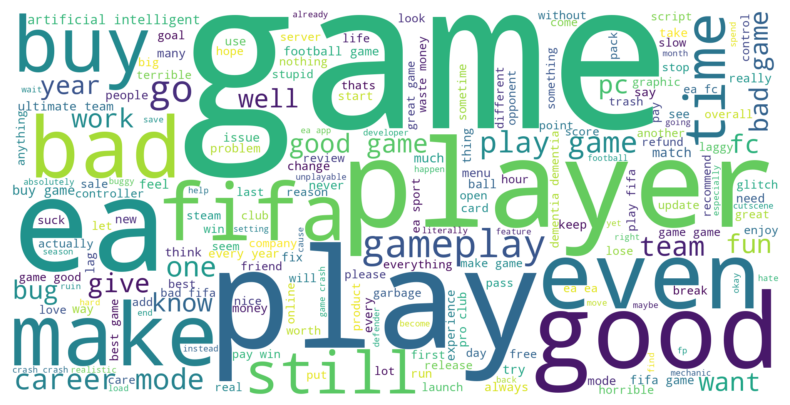

In [21]:
# fc24
all_text = ' '.join(df_fc24['ReviewText'].tolist())

wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 1999.5, 999.5, -0.5)

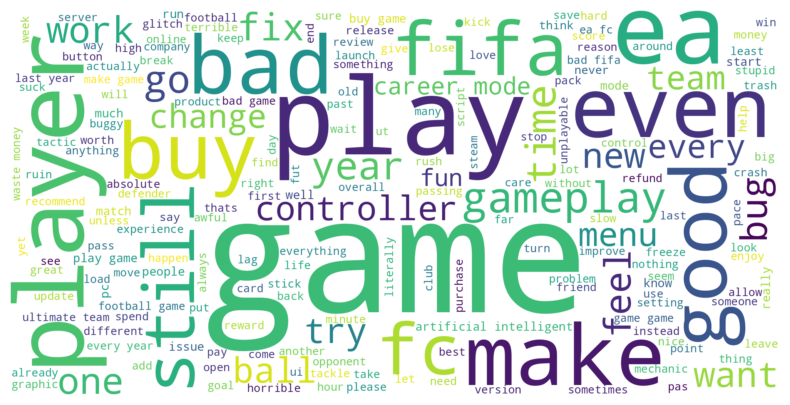

In [22]:
# fc25
all_text = ' '.join(df_fc25['ReviewText'].tolist())

wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## Perbandingan Review vs Sentimet

In [23]:
# distribusi data
def create_grouped_pie_charts(df, game_name):
    review_counts = df['Review'].value_counts()
    sentiment_counts = df['Sentiment'].value_counts()
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].pie(
        review_counts,
        labels=review_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#66c2a5', '#fc8d62']
    )
    axes[0].set_title(f'Distribution Review {game_name}')

    axes[1].pie(
        sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#8da0cb', '#e78ac3', '#a6d854']
    )
    axes[1].set_title(f'Distribution Sentiment {game_name}')

    plt.tight_layout()
    plt.show()

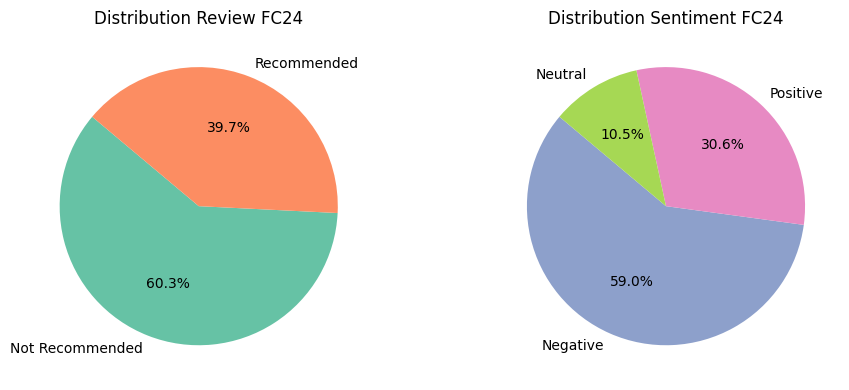

In [24]:
# Plot untuk FC24
create_grouped_pie_charts(df_fc24, 'FC24')

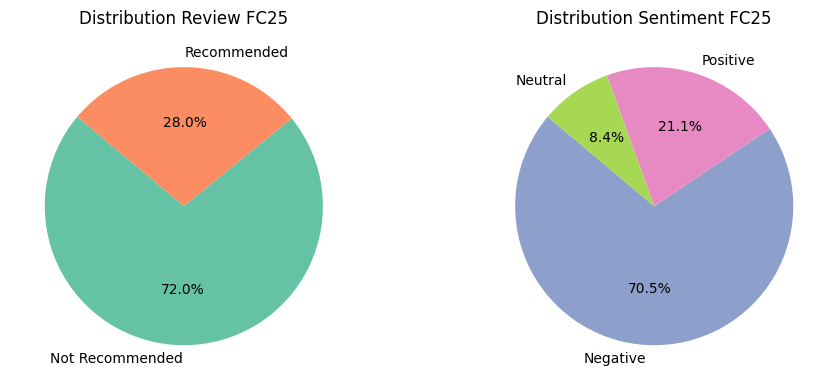

In [25]:
# Plot untuk FC25
create_grouped_pie_charts(df_fc25, 'FC25')

In [26]:
# perbadingan
def plot_review_vs_sentiment(df, game_name):
    review_sentiment_distribution = df.groupby(['Review', 'Sentiment']).size().reset_index(name='Count')

    plt.figure(figsize=(10, 7))
    ax = sns.barplot(
        data=review_sentiment_distribution,
        x='Sentiment',
        y='Count',
        hue='Review',
        ci=None
    )

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

    plt.title(f'Perbadingan Review vs Sentiment for {game_name}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.legend(title='Review')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

<ipython-input-26-318cede78d87>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


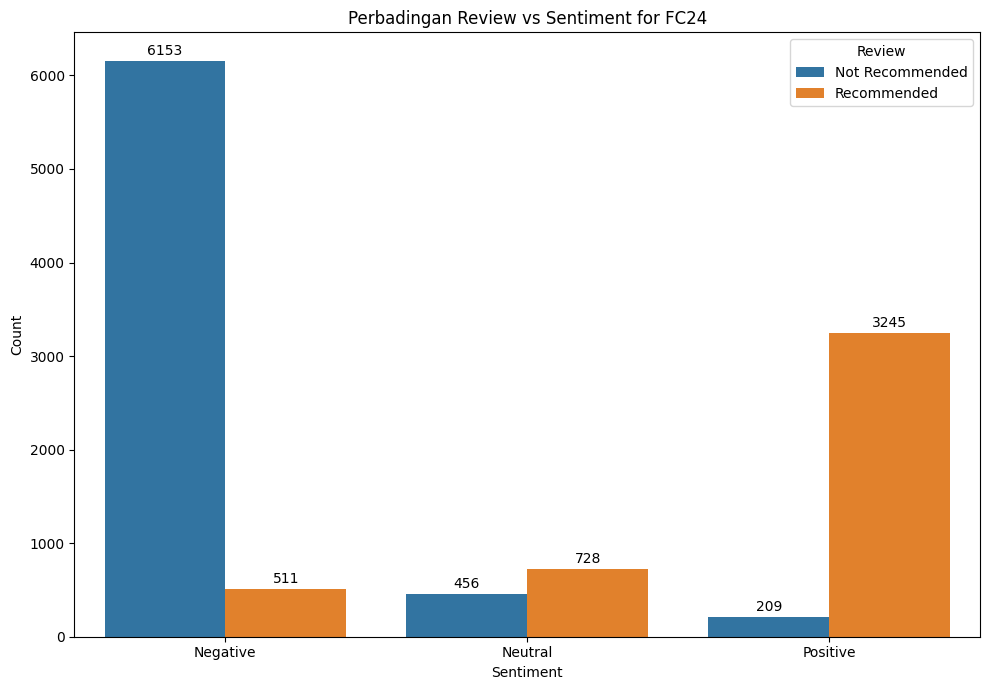

In [27]:
# Plot untuk FC24
plot_review_vs_sentiment(df_fc24, 'FC24')

<ipython-input-26-318cede78d87>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


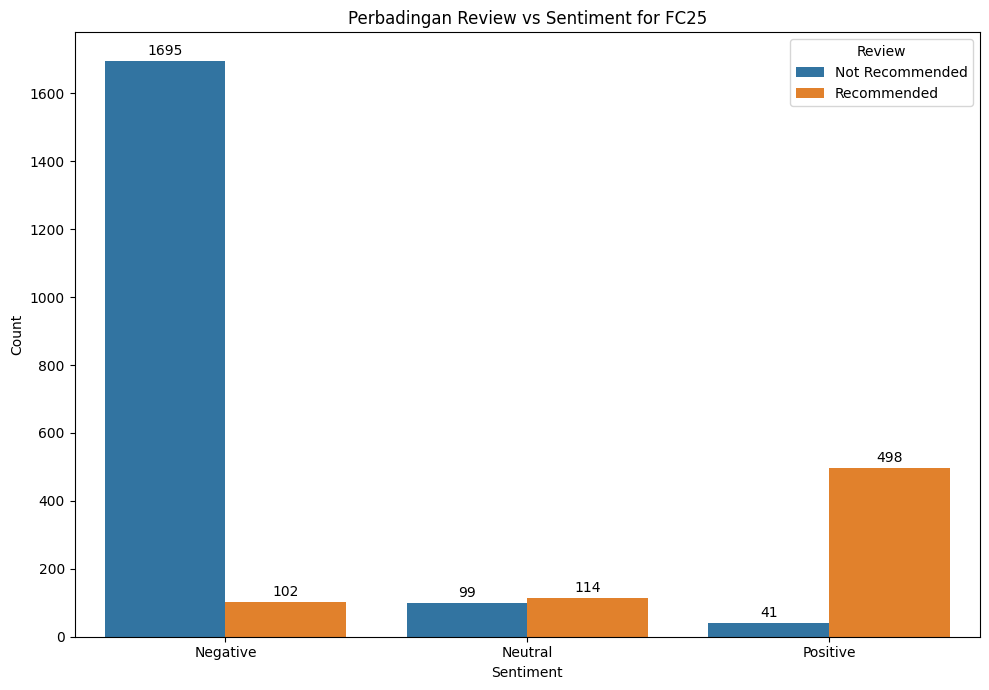

In [28]:
# Plot untuk FC25
plot_review_vs_sentiment(df_fc25, 'FC25')

## Jumlah Review berdasarkan Aspek


In [29]:
def plot_review_count_by_aspect(df, game_name):
    aspect_review_count = df['AspectTerm'].value_counts().reset_index()
    aspect_review_count.columns = ['AspectTerm', 'Count']

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=aspect_review_count,
        x='Count',
        y='AspectTerm',
        palette='viridis')
    plt.title(f'Jumlah Review Berdasarkan Aspek - {game_name}')
    plt.xlabel('Jumlah Review')
    plt.ylabel('Aspek')
    plt.tight_layout()
    plt.show()

<ipython-input-29-cece75e6bed4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


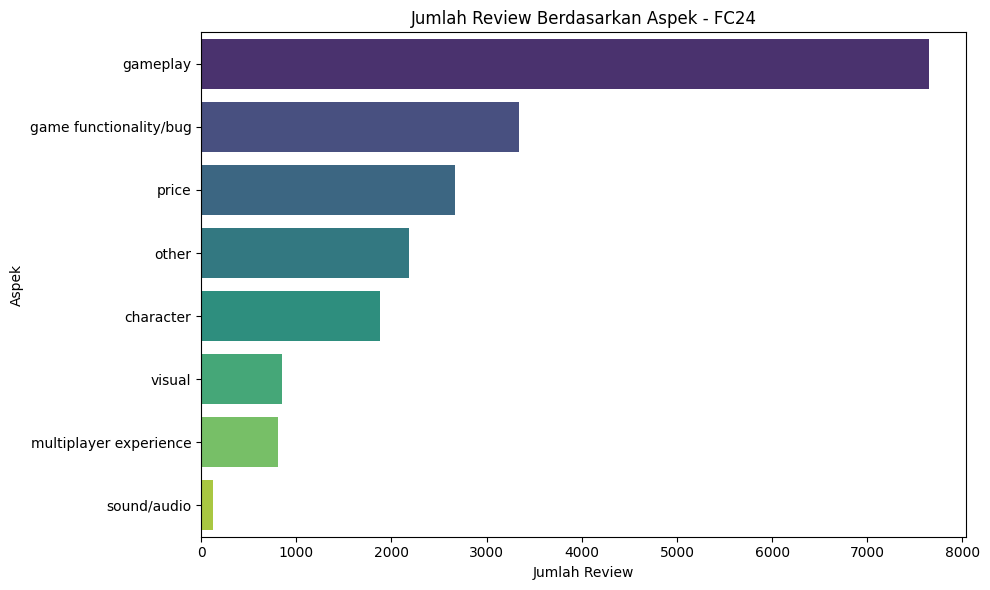

In [30]:
plot_review_count_by_aspect(df_clean_fc24, 'FC24')

<ipython-input-29-cece75e6bed4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


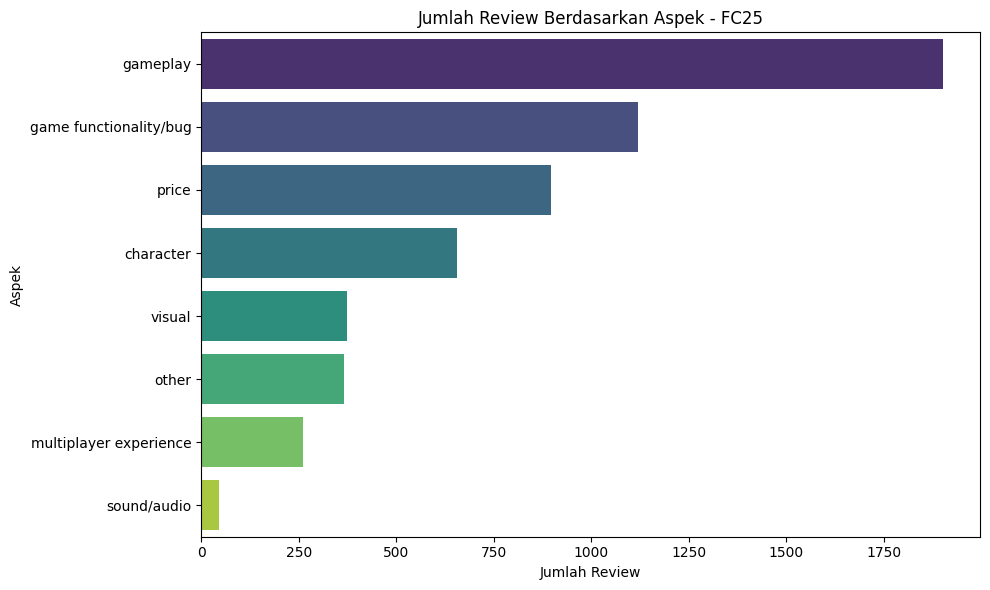

In [31]:
plot_review_count_by_aspect(df_clean_fc25, 'FC25')

## Distribusi Sentiment Berdasarkan Aspek

In [32]:
def plot_sentiment_by_aspect(df1, df2, aspect):
    df1_aspect = df1[df1['AspectTerm'] == aspect]
    df2_aspect = df2[df2['AspectTerm'] == aspect]

    sentiment_dist_fc24 = df1_aspect['Sentiment'].value_counts()
    sentiment_dist_fc25 = df2_aspect['Sentiment'].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(10, 6))

    # Pie chart untuk FC24
    axes[0].pie(
        sentiment_dist_fc24,
        labels=sentiment_dist_fc24.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#66c2a5', '#fc8d62', '#8da0cb']
    )
    axes[0].set_title('FC 24')

    # Pie chart untuk FC25
    axes[1].pie(
        sentiment_dist_fc25,
        labels=sentiment_dist_fc25.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#66c2a5', '#fc8d62', '#8da0cb']
    )
    axes[1].set_title('FC 25')
    fig.suptitle(f'{aspect}', fontsize=16)
    plt.tight_layout()
    plt.show()


### Aspek Multiplayer Experience

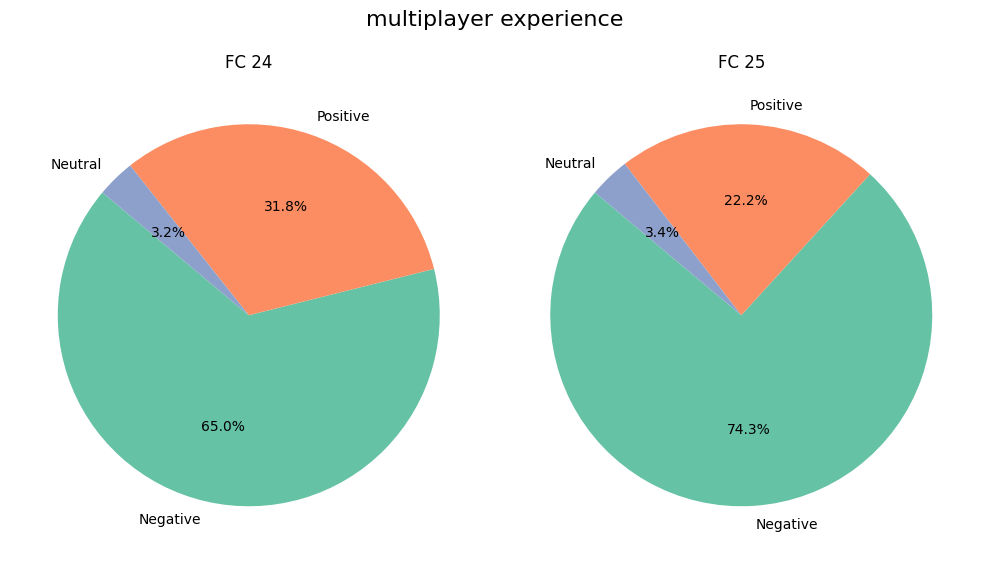

In [33]:
plot_sentiment_by_aspect(df_clean_fc24, df_clean_fc25, 'multiplayer experience')

### Aspek Character

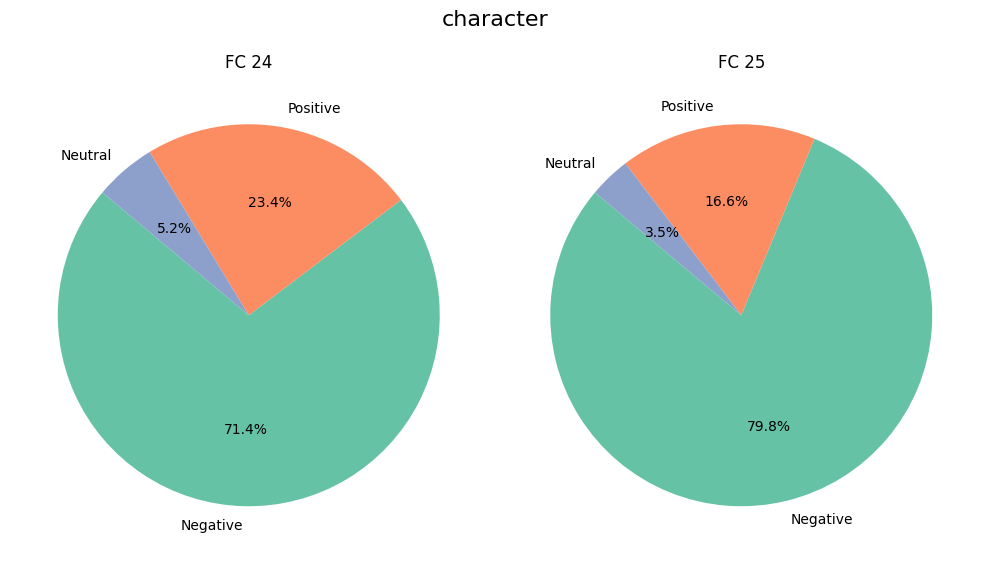

In [34]:
plot_sentiment_by_aspect(df_clean_fc24, df_clean_fc25, 'character')

### Aspek Gameplay

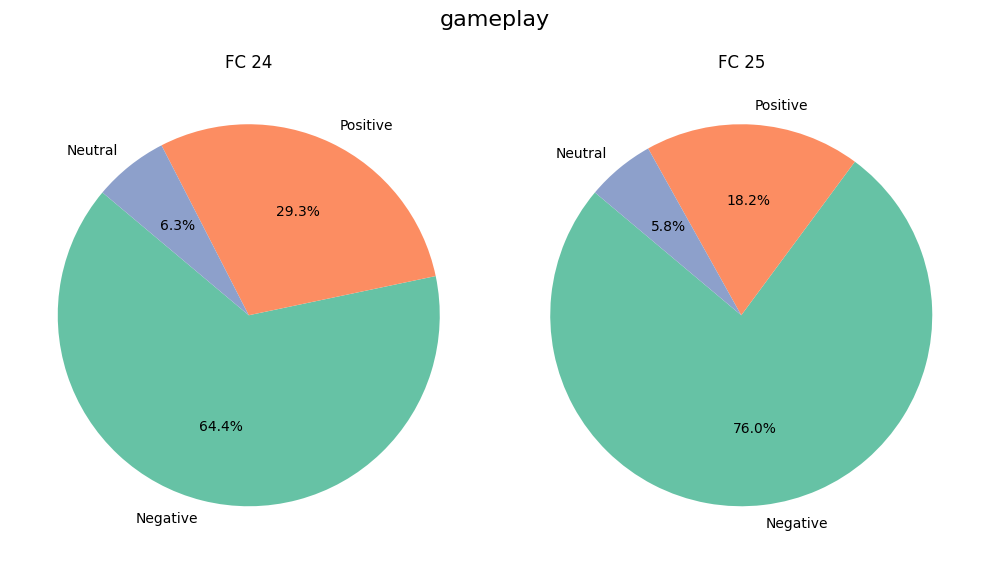

In [35]:
plot_sentiment_by_aspect(df_clean_fc24, df_clean_fc25, 'gameplay')

### Aspek Sound/Audio

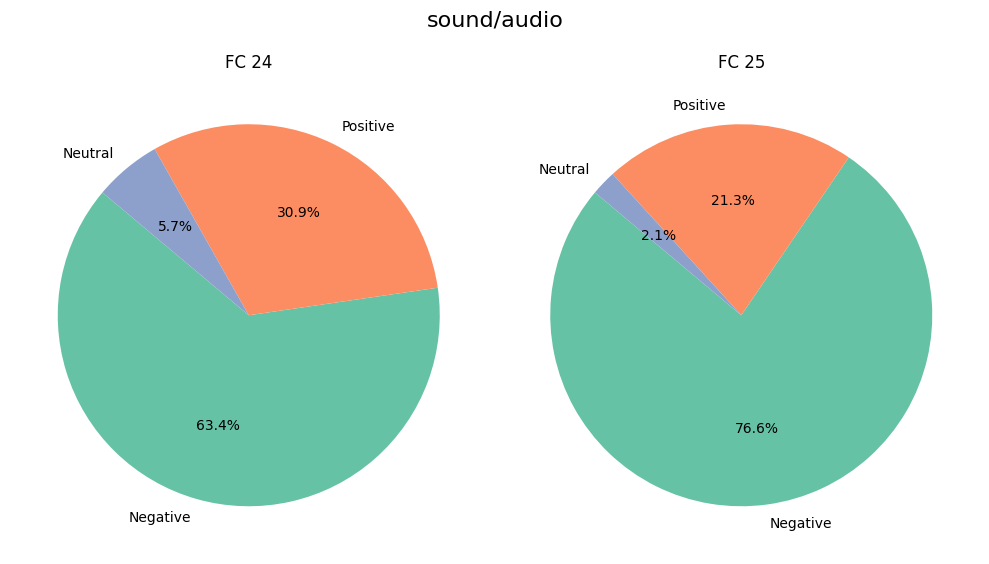

In [36]:
plot_sentiment_by_aspect(df_clean_fc24, df_clean_fc25, 'sound/audio')

### Aspek Visual

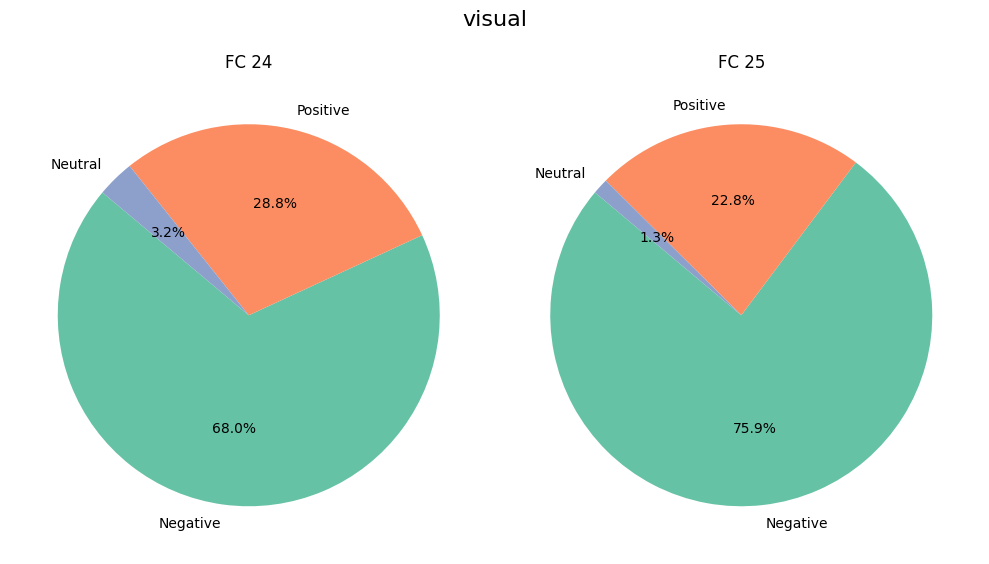

In [37]:
plot_sentiment_by_aspect(df_clean_fc24, df_clean_fc25, 'visual')

### Aspek Game functionality/Bug

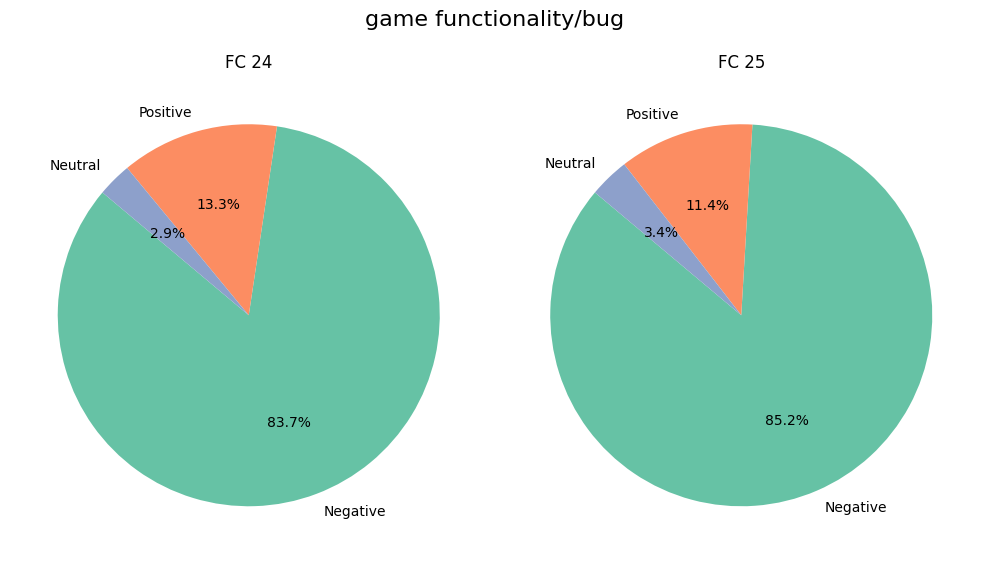

In [38]:
plot_sentiment_by_aspect(df_clean_fc24, df_clean_fc25, 'game functionality/bug')

### Aspek Price

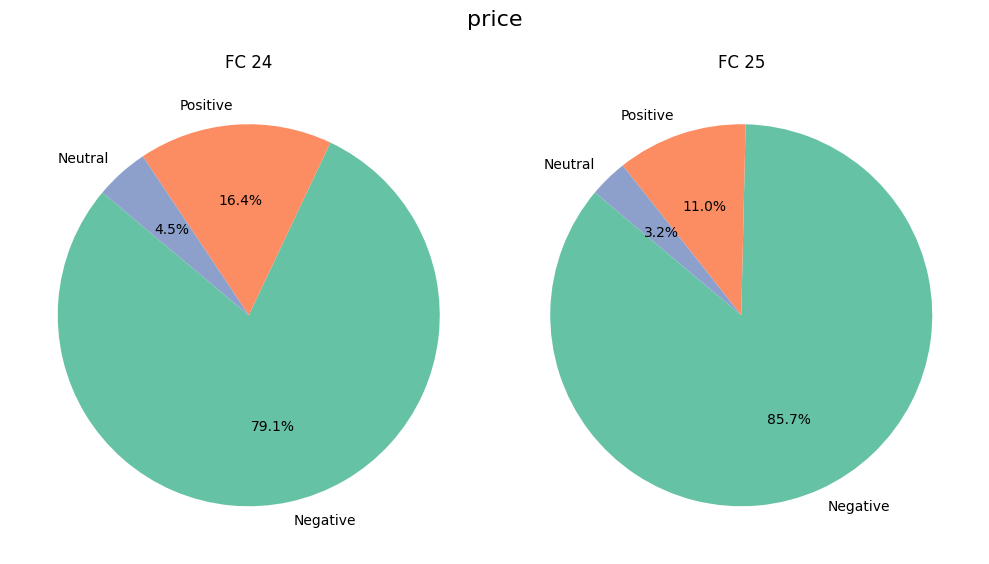

In [39]:
plot_sentiment_by_aspect(df_clean_fc24, df_clean_fc25, 'price')

### Aspek Lain-Lain

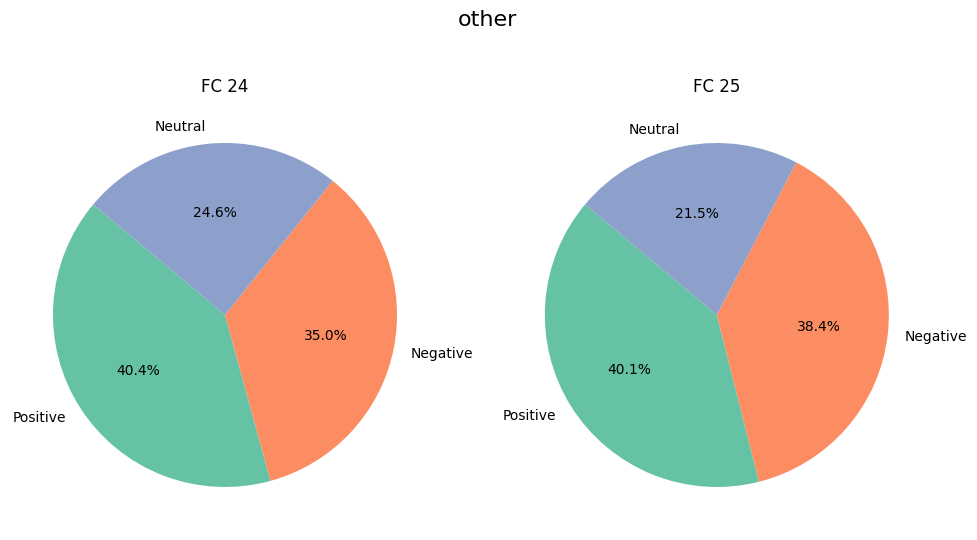

In [40]:
plot_sentiment_by_aspect(df_clean_fc24, df_clean_fc25, 'other')

# Classification Modelling

## Preparation

In [119]:
# concat
df_clean = pd.concat([df_fc24, df_fc25], ignore_index=True)
df_clean.head()

,ReviewText,Review,ReviewLength,PlayHours,DatePosted,Language,Positive,Negative,Neutral,Compound,Sentiment,AspectTerm
0,bad game ever even make purchase man i am buy ...,Not Recommended,96,53.1 hrs on record,Posted: 14 November,en,0.000,0.350,0.650,-0.7906,Negative,"[gameplay, price]"
1,game rigged casino,Not Recommended,28,136.4 hrs on record,Posted: November 13,en,0.000,0.556,0.444,-0.3612,Negative,[gameplay]
2,start good begin suck greatly couple hour like...,Not Recommended,440,39.0 hrs on record,Posted: November 13,en,0.285,0.070,0.645,0.9125,Negative,"[game functionality/bug, gameplay, price]"
3,someone force play kbdmouse due controller inc...,Not Recommended,379,71.0 hrs on record,Posted: November 13,en,0.045,0.220,0.734,-0.8519,Negative,"[game functionality/bug, gameplay, character, ..."
4,help regard direct x error,Recommended,28,62.5 hrs on record,Posted: November 10,en,0.365,0.365,0.270,0.0000,Negative,[game functionality/bug]


In [120]:
len(df_clean)

13851

In [121]:
print(df_clean['Sentiment'].value_counts())

Sentiment
Negative    8461
Positive    3993
Neutral     1397
Name: count, dtype: int64


## Encoding Target

In [122]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_clean['Sentiment'] = encoder.fit_transform(df_clean['Sentiment'])

In [123]:
encoder.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

## BiLSTM

In [126]:
X = df_clean['ReviewText']
y = df_clean['Sentiment']

# Tokenization and padding
max_features = 17118  # Maximum number of words to keep
maxlen = 40           # Maximum sequence length

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=maxlen)

vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size (input_dim): {vocab_size}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Vocabulary size (input_dim): 17118


In [127]:
# Hitung panjang setiap teks
text_lengths = df_clean['ReviewText'].apply(lambda x: len(x.split()))

# Statistik panjang teks
print(f"Rata-rata panjang teks: {np.mean(text_lengths):.2f}")
print(f"Median panjang teks: {np.median(text_lengths)}")
print(f"Panjang maksimum teks: {np.max(text_lengths)}")

Rata-rata panjang teks: 18.09
Median panjang teks: 7.0
Panjang maksimum teks: 714


Karena panjang maksimum (714) jauh lebih besar daripada rata-rata dan median, memilih panjang yang terlalu besar akan membuat model tidak efisien.
Pilih panjang yang mencakup sekitar 90–95% teks untuk menangani sebagian besar data tanpa padding berlebihan.

In [128]:
# Hitung persentil 90 dan 95
percentil_90 = np.percentile(text_lengths, 90)
percentil_95 = np.percentile(text_lengths, 95)

print(f"Persentil 90: {percentil_90}")
print(f"Persentil 95: {percentil_95}")

Persentil 90: 40.0
Persentil 95: 63.0


In [129]:
# Define the BiLSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    Bidirectional(LSTM(64, dropout=0.4, recurrent_dropout=0.4, return_sequences=True)),
    BatchNormalization(),
    Bidirectional(LSTM(32, dropout=0.4, recurrent_dropout=0.4)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [130]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping]
)

Epoch 1/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 47s 203ms/step - accuracy: 0.6097 - loss: 1.4560 - val_accuracy: 0.7499 - val_loss: 0.8629
Epoch 2/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 40s 198ms/step - accuracy: 0.8362 - loss: 0.5810 - val_accuracy: 0.8466 - val_loss: 0.5103
Epoch 3/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 42s 201ms/step - accuracy: 0.8951 - loss: 0.3602 - val_accuracy: 0.8575 - val_loss: 0.4282
Epoch 4/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 42s 205ms/step - accuracy: 0.9204 - loss: 0.2716 - val_accuracy: 0.8538 - val_loss: 0.4664
Epoch 5/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 42s 211ms/step - accuracy: 0.9274 - loss: 0.2392 - val_accuracy: 0.8499 - val_loss: 0.4898


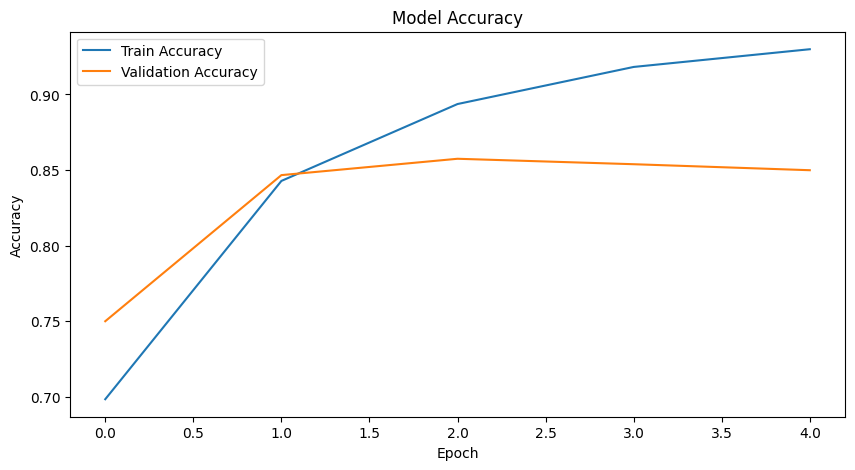

In [131]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

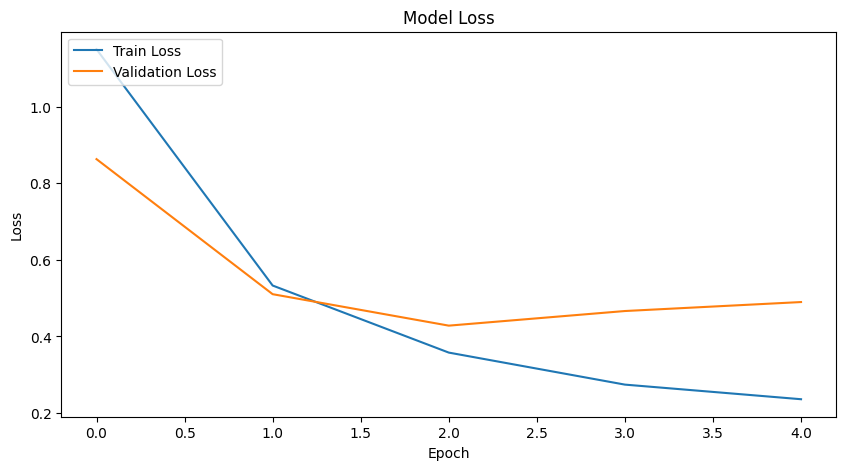

In [132]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [133]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Loss: 0.4282
Validation Accuracy: 0.8575


In [134]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print(classification_report(y_test, y_pred_classes))

87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1699
           1       0.69      0.69      0.69       271
           2       0.84      0.80      0.82       801

    accuracy                           0.86      2771
   macro avg       0.81      0.80      0.80      2771
weighted avg       0.86      0.86      0.86      2771



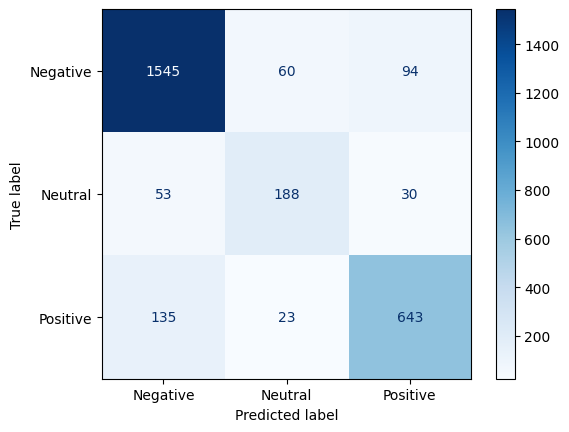

In [135]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

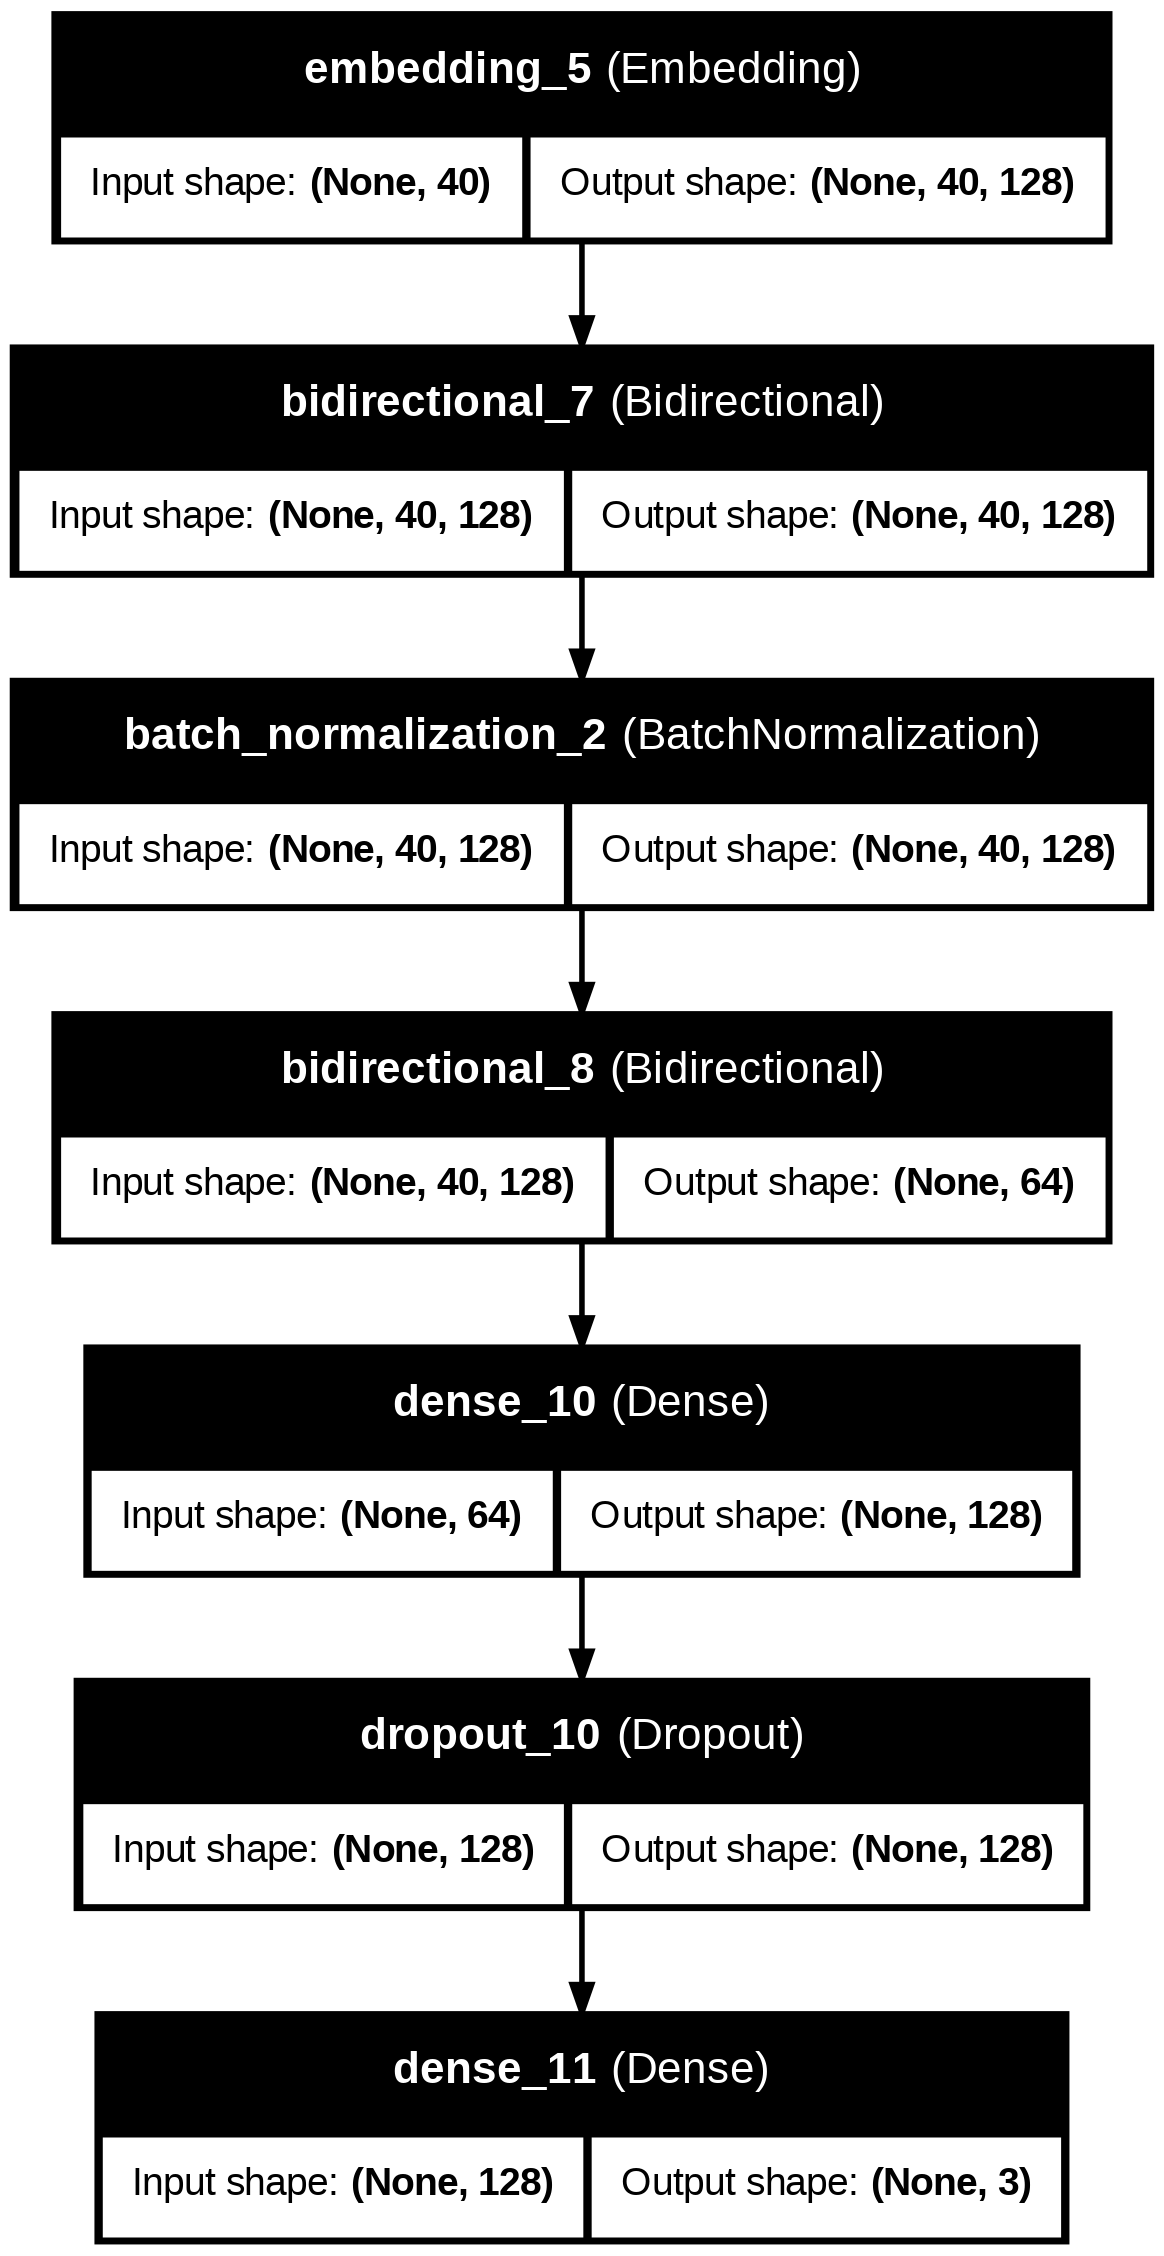

In [136]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="BiLSTM_Model_Architecture.png", show_shapes=True, show_layer_names=True)

## Analisis Kesalahan

In [140]:
# Find indices where predictions are wrong
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels
incorrect_indices = np.where(y_pred_classes != y_test)[0]

# Print the incorrect predictions along with text, true label, and predicted label
for index in incorrect_indices:
    print("Incorrect Prediction:")
    # Get original index from y_test
    original_index = y_test.index[index]
    print("Text:", df_clean['ReviewText'].iloc[original_index])
    print("True Label:", encoder.inverse_transform([y_test.iloc[index]])[0])
    print("Predicted Label:", encoder.inverse_transform([y_pred_classes[index]])[0])
    print("-" * 20)

Incorrect Prediction:
Text: cannot figure defend
True Label: Neutral
Predicted Label: Negative
--------------------
Incorrect Prediction:
Text: trash good game
True Label: Positive
Predicted Label: Negative
--------------------
Incorrect Prediction:
Text: american fully recommend game to be honest i do not care bout game go subscribe sidemen
True Label: Positive
Predicted Label: Negative
--------------------
Incorrect Prediction:
Text: fifa happen souless entity like corporation take reign run i am look disneyit become zero sum game good imaginative creative player penalize name profit heck play game do not forget buy perk fc bad interation experiment studio canadayou devs never play minute real football constantly twecking game algorithm base late call artificial intelligent data know check b literally watch griezmann miss three glorious chance france euro fc god gift game literally ophey artificial intelligent overrate get dev noobsit suck konami give pro evolution deal piece corpora

# LSTM + ABSA

In [3]:
df_clean = pd.read_csv('df_absa.csv')
df_clean.head()

,ReviewText,Review,ReviewLength,PlayHours,DatePosted,Language,Positive,Negative,Neutral,Compound,Sentiment,AspectTerm
0,bad game ever even make purchase man i am buy ...,Not Recommended,96,53.1 hrs on record,Posted: 14 November,en,0.000,0.350,0.650,-0.7906,Negative,gameplay
1,bad game ever even make purchase man i am buy ...,Not Recommended,96,53.1 hrs on record,Posted: 14 November,en,0.000,0.350,0.650,-0.7906,Negative,price
2,game rigged casino,Not Recommended,28,136.4 hrs on record,Posted: November 13,en,0.000,0.556,0.444,-0.3612,Negative,gameplay
3,start good begin suck greatly couple hour like...,Not Recommended,440,39.0 hrs on record,Posted: November 13,en,0.285,0.070,0.645,0.9125,Negative,game functionality/bug
4,start good begin suck greatly couple hour like...,Not Recommended,440,39.0 hrs on record,Posted: November 13,en,0.285,0.070,0.645,0.9125,Negative,gameplay


In [4]:
df_clean['Sentiment'] = df_clean['Sentiment'].replace('negative', 'Negative')

In [5]:
print(df_clean['Sentiment'].value_counts())

Sentiment
Negative    17477
Positive     5969
Neutral      1694
Name: count, dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_clean['Sentiment'] = encoder.fit_transform(df_clean['Sentiment'])

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Flatten, RepeatVector, LSTM, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

NUM_WORDS = 17119        # Jumlah kata maksimal untuk tokenizer
EMBEDDING_SIZE = 128     # Ukuran embedding
Max_Len = 73            # Panjang maksimum dari setiap review
lstm_units = 1024        # Unit LSTM

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df_clean['ReviewText'].values)

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size (input_dim): {vocab_size}")

Vocabulary size (input_dim): 17119


In [9]:
# Hitung panjang setiap teks
text_lengths = df_clean['ReviewText'].apply(lambda x: len(x.split()))

# Statistik panjang teks
print(f"Rata-rata panjang teks: {np.mean(text_lengths):.2f}")
print(f"Median panjang teks: {np.median(text_lengths)}")
print(f"Panjang maksimum teks: {np.max(text_lengths)}")

Rata-rata panjang teks: 32.10
Median panjang teks: 14.0
Panjang maksimum teks: 714


In [10]:
# Hitung persentil 90 dan 95
percentil_90 = np.percentile(text_lengths, 90)
percentil_95 = np.percentile(text_lengths, 95)

print(f"Persentil 90: {percentil_90}")
print(f"Persentil 95: {percentil_95}")

Persentil 90: 73.0
Persentil 95: 121.0


In [11]:
X_text = pad_sequences(tokenizer.texts_to_sequences(df_clean['ReviewText'].values), maxlen=Max_Len)
X_aspect = pad_sequences(tokenizer.texts_to_sequences(df_clean['AspectTerm'].values), maxlen=1)
y = df_clean['Sentiment'].values

X_train_text, X_test_text, X_train_aspect, X_test_aspect, y_train, y_test = train_test_split(X_text, X_aspect, y, test_size=0.2, random_state=42)

In [12]:
from keras.layers import (
    Input, Embedding, SpatialDropout1D, LSTM, GRU, Dense, Dropout, Flatten,
    RepeatVector, concatenate, BatchNormalization
)
from keras.models import Model
from keras.regularizers import l2

def ae_lstm_optimized(lstm_units=128, num_dense_units=32):
    # Embedding
    input_text = Input(shape=(Max_Len,), name="Text_Input")
    input_aspect = Input(shape=(1,), name="Aspect_Input")

    # Text Embedding
    word_embedding = Embedding(
        NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len, name="Text_Embedding"
    )
    text_embed = word_embedding(input_text)
    text_embed = SpatialDropout1D(0.3)(text_embed)  # Dropout ditingkatkan

    # Aspect Embedding
    asp_embedding = Embedding(
        NUM_WORDS, EMBEDDING_SIZE, input_length=1, name="Aspect_Embedding"
    )
    aspect_embed = asp_embedding(input_aspect)
    aspect_embed = Flatten()(aspect_embed)
    repeat_aspect = RepeatVector(Max_Len)(aspect_embed)

    # Concatenate Text and Aspect Embeddings
    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)

    # LSTM + GRU Layers with L2 Regularization
    lstm_layer = LSTM(
        lstm_units, return_sequences=True, kernel_regularizer=l2(0.01), name="LSTM_Layer"
    )(input_concat)
    lstm_layer = BatchNormalization()(lstm_layer)  # Stabilisasi pelatihan
    lstm_layer = GRU(
        lstm_units // 2, return_sequences=False, kernel_regularizer=l2(0.01), name="GRU_Layer"
    )(lstm_layer)

    # Fully Connected Layers
    dense_layer = Dense(
        num_dense_units, activation='relu', kernel_regularizer=l2(0.01), name="Dense_Layer"
    )(lstm_layer)
    dense_layer = Dropout(0.5)(dense_layer)  # Dropout ditingkatkan

    # Output Layer
    output_layer = Dense(3, activation='softmax', name="Output_Layer")(dense_layer)

    # Modelling
    model = Model([input_text, input_aspect], output_layer)
    return model

# Instantiate and Summarize the Model
ae_lstm_model = ae_lstm_optimized(lstm_units=128, num_dense_units=32)
ae_lstm_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
ae_lstm_model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Aspect_Input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Text_Input          │ (None, 73)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Aspect_Embedding    │ (None, 1, 128)    │  2,191,232 │ Aspect_Input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Text_Embedding      │ (None, 73, 128)   │  2,191,232 │ Text_Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 128)       │          0 │ Aspect_Embedding… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, 73, 128)   │          0 │ Text_Embedding[0… │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 73, 128)   │          0 │ flatten[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 73, 256)   │          0 │ spatial_dropout1… │
│ (Concatenate)       │                   │            │ repeat_vector[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LSTM_Layer (LSTM)   │ (None, 73, 128)   │    197,120 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 73, 128)   │        512 │ LSTM_Layer[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ GRU_Layer (GRU)     │ (None, 64)        │     37,248 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_Layer (Dense) │ (None, 32)        │      2,080 │ GRU_Layer[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32)        │          0 │ Dense_Layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 3)         │         99 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,619,523 (17.62 MB)

 Trainable params: 4,619,267 (17.62 MB)

 Non-trainable params: 256 (1.00 KB)

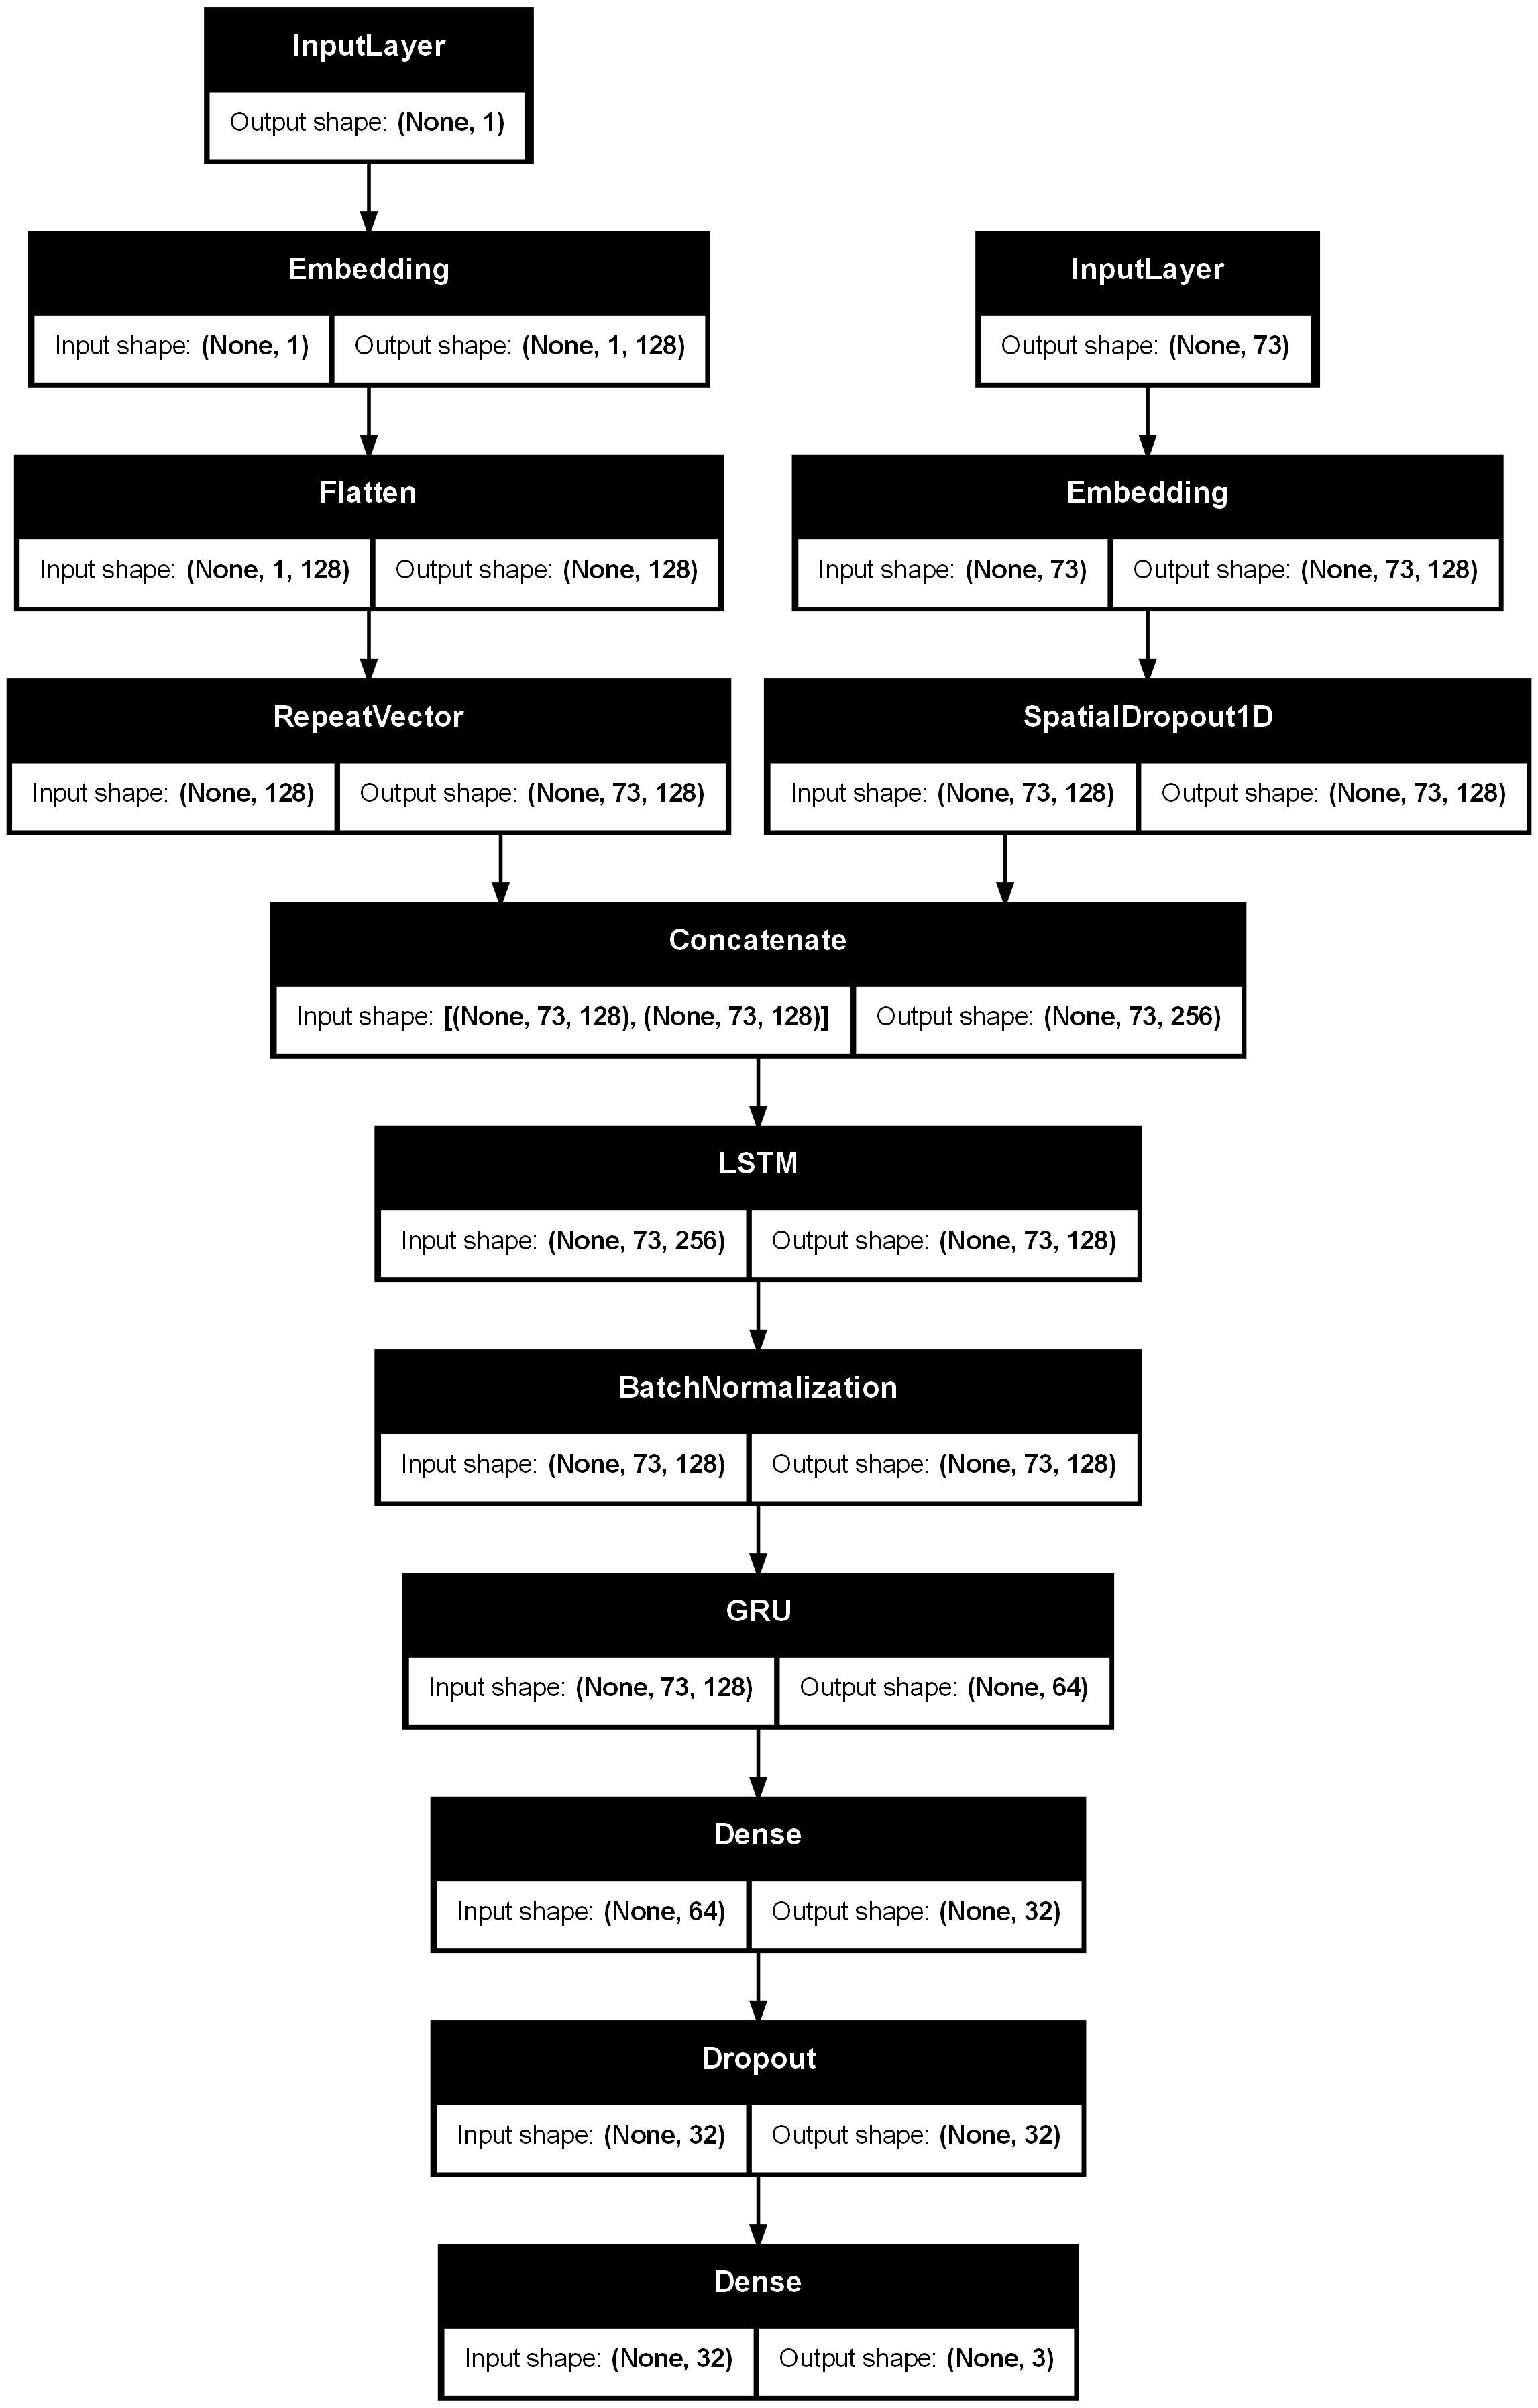

In [13]:
# Visualisasi model
dot_img_file = 'model_ae_lstm.png'
tf.keras.utils.plot_model(ae_lstm_model, to_file=dot_img_file, show_shapes=True)

In [14]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss', patience=2, verbose=1, factor=0.1, min_lr=1e-6
)
early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, verbose=1, restore_best_weights=True
)

ae_lstm_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = ae_lstm_model.fit(
    [X_train_text, X_train_aspect], y_train,
    validation_data=([X_test_text, X_test_aspect], y_test),
    batch_size=64,
    epochs=50,
    callbacks=[learning_rate_reduction, early_stopping]
)


Epoch 1/50


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Text_Input', 'Aspect_Input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


315/315 ━━━━━━━━━━━━━━━━━━━━ 75s 208ms/step - accuracy: 0.7500 - loss: 2.7472 - val_accuracy: 0.8423 - val_loss: 0.7864 - learning_rate: 0.0010
Epoch 2/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 62s 197ms/step - accuracy: 0.8947 - loss: 0.4466 - val_accuracy: 0.9025 - val_loss: 0.3595 - learning_rate: 0.0010
Epoch 3/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 65s 205ms/step - accuracy: 0.9279 - loss: 0.2942 - val_accuracy: 0.8661 - val_loss: 0.3940 - learning_rate: 0.0010
Epoch 4/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 63s 200ms/step - accuracy: 0.9479 - loss: 0.2286 - val_accuracy: 0.9127 - val_loss: 0.2981 - learning_rate: 0.0010
Epoch 5/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 62s 198ms/step - accuracy: 0.9540 - loss: 0.1971 - val_accuracy: 0.9021 - val_loss: 0.3364 - learning_rate: 0.0010
Epoch 6/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9524 - loss: 0.2023
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
315/315 ━━━━━━━━━━━━━━━━━━━━ 69s 219ms/step - accuracy: 0.9524 - loss: 

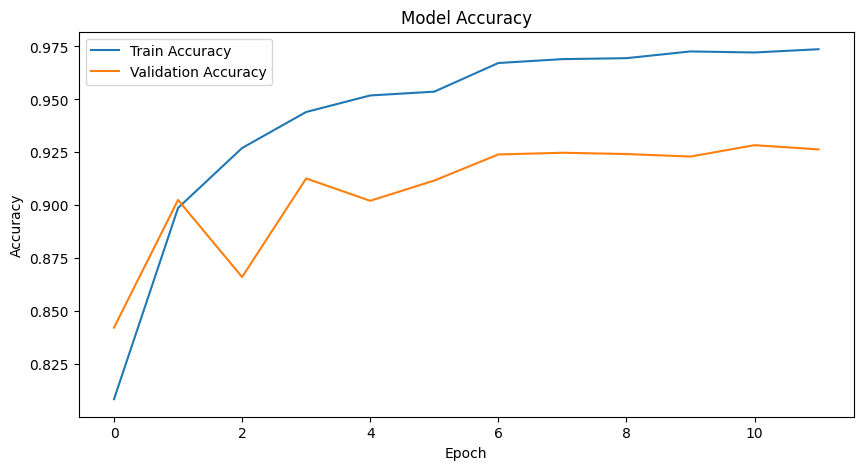

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

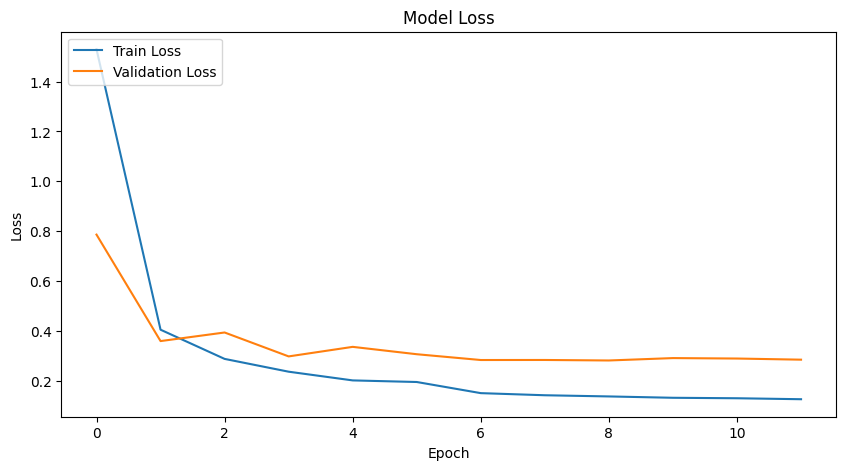

In [16]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [17]:
# Evaluate the model on validation data
val_loss, val_accuracy = ae_lstm_model.evaluate(
    [X_test_text, X_test_aspect], y_test, verbose=1
)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9283 - loss: 0.2743
Validation Loss: 0.2818
Validation Accuracy: 0.9242


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes for validation data
y_pred = ae_lstm_model.predict([X_test_text, X_test_aspect])
y_pred_classes = y_pred.argmax(axis=1)  # Assuming a multi-class problem

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3465
           1       0.72      0.68      0.70       342
           2       0.88      0.91      0.90      1221

    accuracy                           0.92      5028
   macro avg       0.85      0.85      0.85      5028
weighted avg       0.92      0.92      0.92      5028



In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate weighted F1-score for each label
f1_scores_per_label = f1_score(y_test, y_pred_classes, average=None)

# Print the F1-score for each label
for i, score in enumerate(f1_scores_per_label):
    print(f"F1-score for label {encoder.classes_[i]}: {score:.4f}")

average_precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f"Average Precision: {average_precision:.4f}")

average_recall = recall_score(y_test, y_pred_classes, average='weighted')
print(f"Average Recall: {average_recall:.4f}")

weighted_f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f"Weighted F1-score: {weighted_f1:.4f}")

F1-score for label Negative: 0.9556
F1-score for label Neutral: 0.6996
F1-score for label Positive: 0.8975
Average Precision: 0.9240
Average Recall: 0.9242
Weighted F1-score: 0.9241


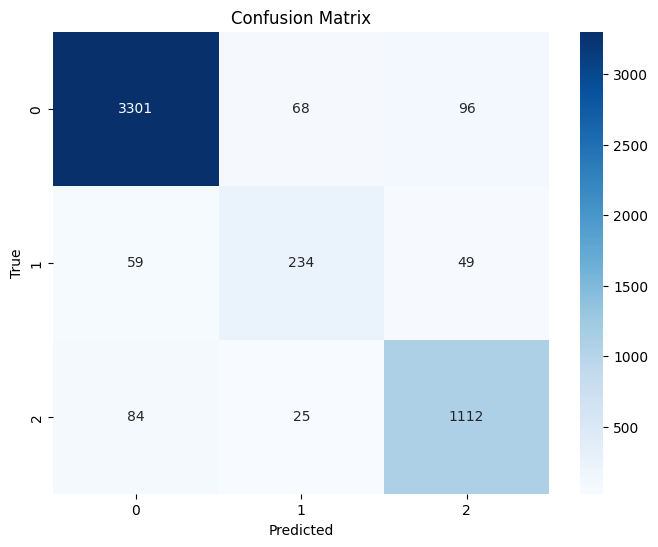

In [20]:
cfm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [21]:
# Convert y_test to NumPy array if it's a DataFrame or Series
if isinstance(y_test, (pd.DataFrame, pd.Series)):
    y_test_array = y_test.to_numpy()
else:
    y_test_array = y_test

# Get predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Find indices where predictions are wrong
incorrect_indices = np.where(y_pred_classes != y_test_array)[0]

# Print the incorrect predictions along with text, true label, and predicted label
for index in incorrect_indices:
    print("Incorrect Prediction:")
    
    # Use index directly to access text and labels
    print("Text:", df_clean['ReviewText'].iloc[index])
    
    # Ensure encoder is applied correctly
    true_label = encoder.inverse_transform([y_test_array[index]])[0] if encoder else y_test_array[index]
    pred_label = encoder.inverse_transform([y_pred_classes[index]])[0] if encoder else y_pred_classes[index]
    
    print("True Label:", true_label)
    print("Predicted Label:", pred_label)
    print("-" * 20)


Incorrect Prediction:
Text: sick
True Label: Negative
Predicted Label: Neutral
--------------------
Incorrect Prediction:
Text: crash every time play
True Label: Positive
Predicted Label: Negative
--------------------
Incorrect Prediction:
Text: bad game bad movement every single aspect game horrible bad referee bad everything also game favor artificial intelligent rather player horrible game play real football game
True Label: Negative
Predicted Label: Neutral
--------------------
Incorrect Prediction:
Text: game bore know play game thing everytime till noob game hard till do not know game
True Label: Positive
Predicted Label: Negative
--------------------
Incorrect Prediction:
Text: game actually horrible like fc
True Label: Neutral
Predicted Label: Negative
--------------------
Incorrect Prediction:
Text: game lot bug game stop run
True Label: Neutral
Predicted Label: Negative
--------------------
Incorrect Prediction:
Text: game many glitch welcome ea sport though make much money d